# Optimización numérica en una variable

*Matrices y Machine Learning: Sesión $13$*

En este notebook, implementamos los dos métodos de optimización numérica más clásicos para funciones de una variable: El método de descenso y el método de Newton. Suponemos que tenemos una función $f: \R \to \R$ al menos dos veces derivable y vamos a denotar por $x_0$ el punto inicial, $\overline{x}$ el eventual mínimo local que buscamos alcanzar, y por $(x_k)_{k \geq 1}$ la sucesión de puntos intermedios que nuestros métodos generen. Por supuesto nuestra expectativa es que
$$\lim_{k \to \infty} = \overline{x}$$
Como siempre, el método se basa en movernos según lo que indique la primera derivada de la función, por lo que la condición de parada va a ser que $f'(x_k)$ sea suficientemente pequeño, y vamos a estar siempre trabajando con un número de iteraciones máximo $N$, para que las implementaciones de los métodos no nos lleven a un ciclo infinito.

## 1. El método de descenso

Dado un $\alpha > 0$ fijo, la regla de actualización que usamos es la siguiente:

$$x_{k+1} = x_k - \alpha f'(x_k)$$

A continuación, implementamos este método

In [5]:
function descentMethod(f, f_prime, x_0, alpha=1, N=100, epsilon=0.01)
    x = x_0
    k = 0
    L = append!([], x_0)
    while (k <= N)
        if abs(f_prime(x)) < epsilon
            return x, f(x), "punto crítico aproximado", L
        end
        x -= alpha * f_prime(x)
        append!(L, x)
        k += 1
    end
    return x, f(x), "número de iteraciones máximo alcanzado", L
end

descentMethod (generic function with 4 methods)

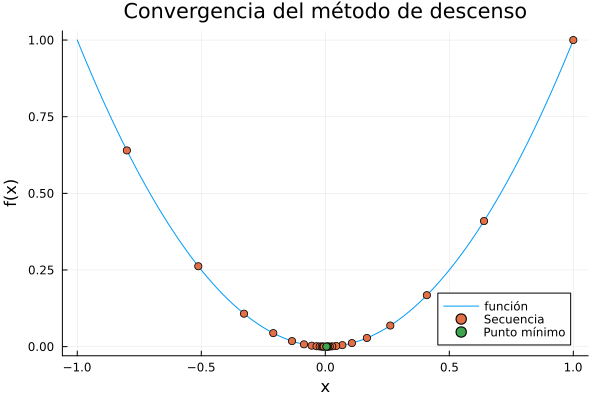

In [26]:
using Plots

f = x -> x^2
f_prime = x -> 2x
x_0 = 1
x_bar, y_bar, m, L = descentMethod(f, f_prime, x_0, 0.9)

x = range(-1, 1, length=100)
y = f.(x)
plot(x, y, label="función")

X = L
Y = f.(L)
scatter!(X, Y, label="Secuencia")
scatter!([x_bar], [y_bar], label="Punto mínimo")
title!("Convergencia del método de descenso")
xlabel!("x")
ylabel!("f(x)")

## 2. El método de Newton

La regla de actualización del método de Newton es entonces la siguiente:

$$x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$$

En que antes debemos chequear que $f''(x_k)$ sea positivo, ya que de lo contrario nos estaremos acercando a un máximo local. A continuación, implementamos este método.

In [ ]:
function newtonMethod(f, f_prime, f_double_prime, x_0, alpha, N=100, epsilon=0.01)
    ### continuar aquí
end